## GRIP-The Sparks Foundation

### Author : S.Shivani

### Task 3 :  Exploratory Data Analysis of a Retail Store

###  Objective:To perform EDA on the dataset 'SampleSuperstore' and find out the weak areas which can be worked upon to make profits.

In [1]:
### importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## reading data
data=pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head(5)  ## gives 1st 5 entries

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape ## gives the shape of data i.e rows x columns

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


###### We see that Postal code and Quantity are of int data type and Sales,Discount and Profit are of float data type and rest are object data type.


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Handling Missing Values

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We see that there are no missiing values.

In [8]:
## Checking for duplicate records
print('No. of Duplicate entries are:', data.duplicated().sum()) 

No. of Duplicate entries are: 17


In [9]:
## Removing Duplicates
data.drop_duplicates(inplace=True)
if data.duplicated().sum()==0:
    print('Yes the duplicates have been dropped')

Yes the duplicates have been dropped


#### Outlier Detection
 They can be detected using multiple plots

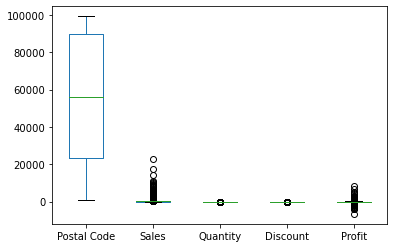

In [10]:
## boxplot
data.boxplot()
plt.grid(False)
plt.show()

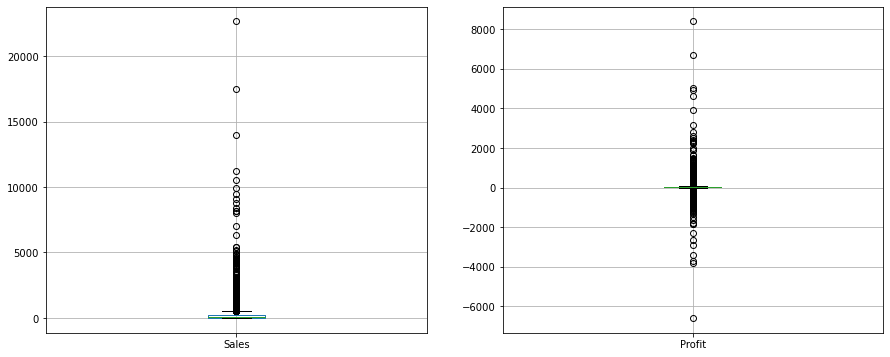

In [11]:
## plotting boxplots to show the outliers
plt.figure(figsize=(15,6))
plt.subplot(121)
data.boxplot(['Sales'])
plt.subplot(122)
data.boxplot(['Profit'])


In [12]:
## Removing Outliers and filling in with the IQR values
def outlier_removal(x):
  sorted(x)
  Q1,Q3=x.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_limit=Q1-(1.5*IQR)
  upper_limit=Q3+(1.5*IQR)
  return lower_limit, upper_limit

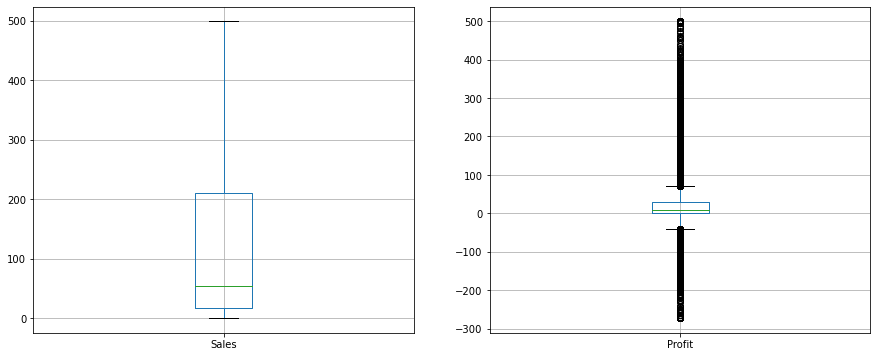

In [13]:
lower_limit,upper_limit=outlier_removal(data['Sales'])
data['Sales']=np.where(data['Sales'] >= upper_limit,upper_limit,data['Sales'])
data['Sales']=np.where(data['Sales'] <= lower_limit,lower_limit,data['Sales'])

lower_bound,upper_bound=outlier_removal(data['Profit'])
data['Profit']=np.where(data['Profit'] >= upper_limit,upper_limit,data['Profit'])
data['Profit']=np.where(data['Profit'] <= lower_limit,lower_limit,data['Profit'])

plt.figure(figsize=(15,6))
plt.subplot(121)
data.boxplot(['Sales'])
plt.subplot(122)
data.boxplot(['Profit'])

##### The outliers have been removed

### Visualistation

#### 1) Correlation Matrix

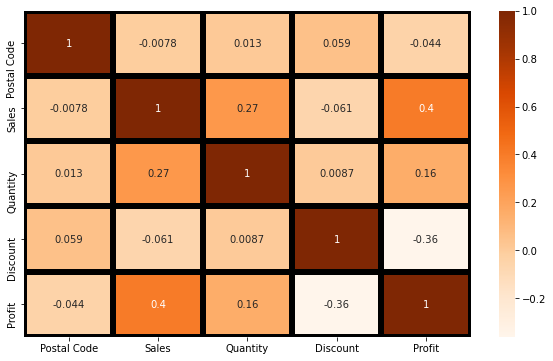

In [14]:
f,ax = plt.subplots(figsize =(10,6))
sns.heatmap(data.corr(method='pearson'),annot=True, cmap="Oranges", lw =5, linecolor='black')

##### Observations made from the correlation matrix:
1. Profit and Sales are highly positively related  compared to others.
2. Sales and Quantity are also positively related.
3. Discount and Profit are highly negatively realted.

In [15]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Text(0.5, 1.0, 'Shipping mode preferred')

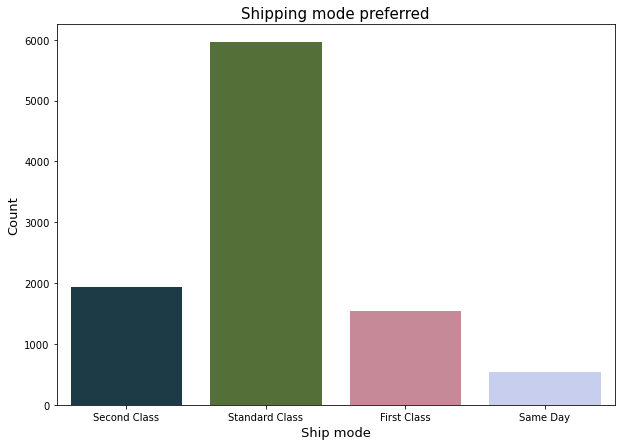

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(data['Ship Mode'],palette='cubehelix')
plt.xlabel('Ship mode',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Shipping mode preferred',fontsize=15)

##### OBSERVATIONS:
##### People prefer the Standard class ship mode more  followed by Second class

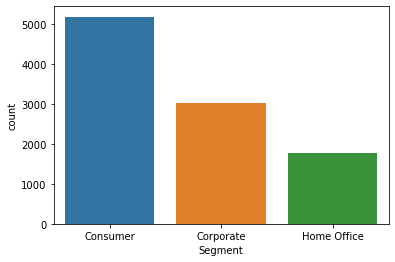

In [17]:
## Segment
sns.countplot(x=data['Segment'])

##### OBSERVATIONS:
##### From this graph we infer that consumers use more of shippings

Text(0.5, 0, 'Shippings')

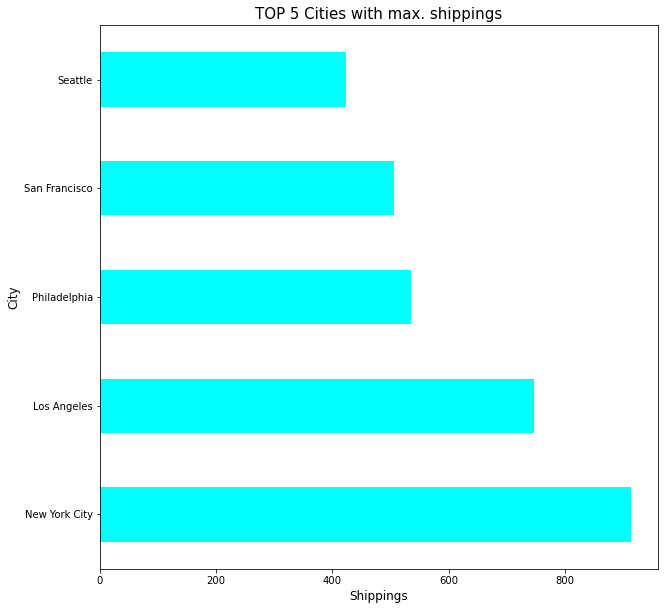

In [18]:
data['City'].value_counts().head().plot(kind='barh',color='cyan',figsize=(10,10))
plt.title('TOP 5 Cities with max. shippings',fontsize=15)
plt.ylabel('City',fontsize=12)
plt.xlabel('Shippings',fontsize=12)

##### OBSERVATIONS:
##### The city with most no. of sales is New york

           State      Sales
3     California  294120.43
30      New York  169172.44
41         Texas  116517.18
45    Washington   75594.17
36  Pennsylvania   75052.60
11      Illinois   60269.30
33          Ohio   55676.01
8        Florida   48051.45
20      Michigan   42312.26
44      Virginia   36112.21


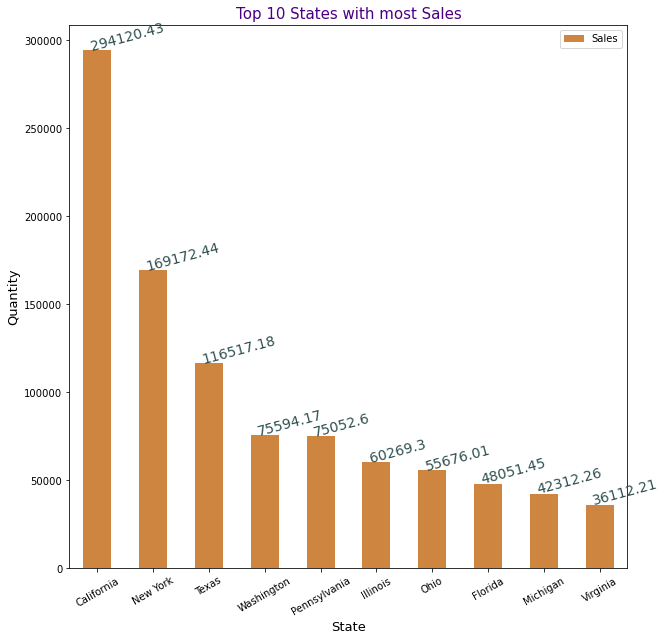

In [19]:
a=data.groupby('State')['Sales'].sum().round(2).reset_index().sort_values(by = 'Sales', ascending = False).head(10)
print(a)
ax=a.plot(kind='bar',figsize=(10,10),color='peru')
ax.set_xticklabels(a['State'],rotation=30)
plt.xlabel('State',fontsize=13)
plt.ylabel('Quantity',fontsize=13)
plt.title('Top 10 States with most Sales',fontsize=15,color='indigo')
for j in ax.patches:
    ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height()),fontsize=14,color='darkslategrey',rotation=15)

Text(0.5, 1.0, 'Top 10 States with most Sales')

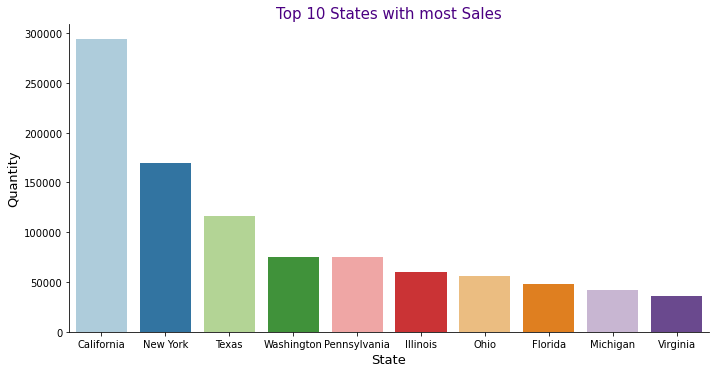

In [20]:
sns.catplot(x = 'State', y = 'Sales', data = a, kind = 'bar', palette = 'Paired',aspect=2)
plt.xlabel('State',fontsize=13)
plt.ylabel('Quantity',fontsize=13)
plt.title('Top 10 States with most Sales',fontsize=15,color='indigo')

##### OBSERVATIONS:
#####  From the above 2 graphs we see that California has done the most no. of sales

TOP 3 Sates with most profits:          State      Profit
3   California  71323.3335
30    New York  54857.2062
45  Washington  24062.0825
TOP 3 Sates with least profits:            State      Profit
11      Illinois  -7041.0566
36  Pennsylvania -10309.5398
41         Texas -11945.5919


Text(0.5, 1.0, 'Profits earned by State')

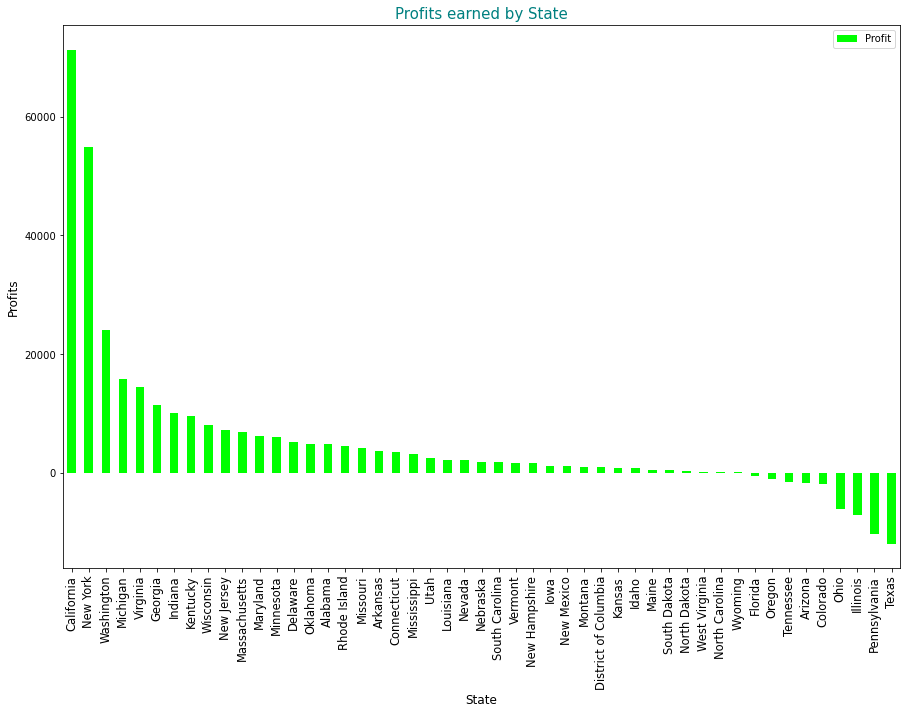

In [21]:
b=data.groupby('State')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
print('TOP 3 Sates with most profits:',b.head(3))
print('TOP 3 Sates with least profits:',b.tail(3))
ax=b.plot(kind='bar',figsize=(15,10),color='lime')
ax.set_xticklabels(b['State'],fontsize=11.5)
ax.set_xlabel('State',fontsize=12)
ax.set_ylabel('Profits',fontsize=12)
ax.set_title('Profits earned by State',fontsize=15,color='teal')

##### OBSERVATIONS:
##### From the above graph we notice that California has made the most profits and Texas made the least profits

Text(0.5, 1.0, 'Region having the most no. of shippings')

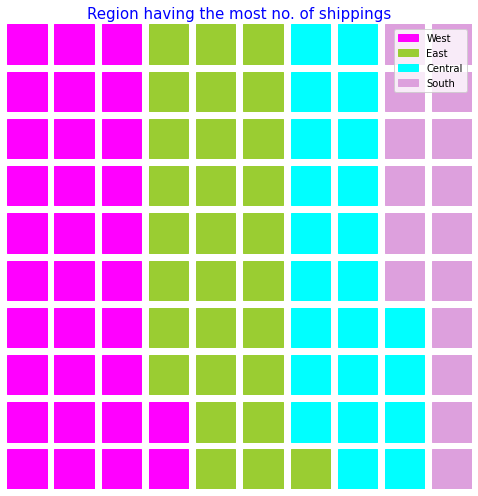

In [22]:
## Region
from pywaffle import Waffle
fig = plt.figure(FigureClass = Waffle,rows = 10,values = data['Region'].value_counts(),columns=10,labels=('West','East','Central','South')
                 ,colors=('magenta','yellowgreen','cyan','plum'),figsize=(10,7))
plt.title('Region having the most no. of shippings',fontsize=15,color='b')

##### OBSERVATIONS:
##### We see that West Region had the most no. of Shippings

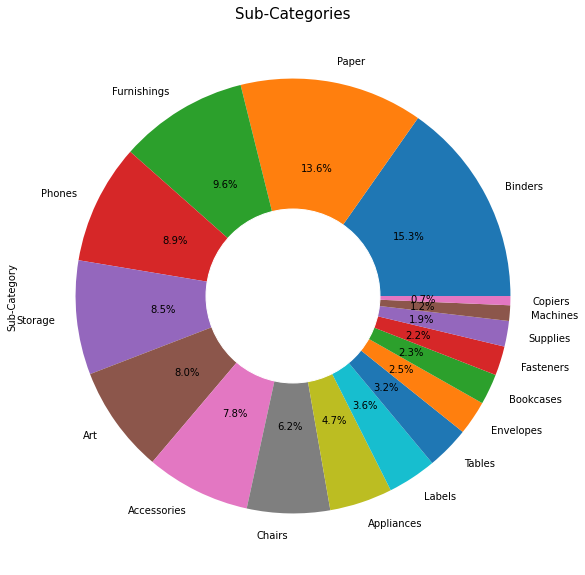

In [23]:
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sub-Categories',fontsize=15)
C=plt.Circle((0,0),0.4, color='white')
p=plt.gcf()
p.gca().add_artist(C)
plt.show()

In [24]:
data.groupby('Category')['Sub-Category'].unique().reset_index()


,Category,Sub-Category
0,Furniture,"[Bookcases, Chairs, Tables, Furnishings]"
1,Office Supplies,"[Labels, Storage, Art, Binders, Appliances, Pa..."
2,Technology,"[Phones, Accessories, Machines, Copiers]"


In [25]:
data.groupby('Sub-Category')[['Profit','Discount']].sum().reset_index()

,Sub-Category,Profit,Discount
0,Accessories,39758.2686,60.80
1,Appliances,18941.7132,77.60
2,Art,6524.6118,59.60
3,Binders,24897.7783,566.20
4,Bookcases,-1423.0647,48.14
5,Chairs,25711.0695,104.70
6,Copiers,21842.1818,11.00
7,Envelopes,6964.1767,20.40
8,Fasteners,949.5182,17.80
9,Furnishings,13569.7640,132.40


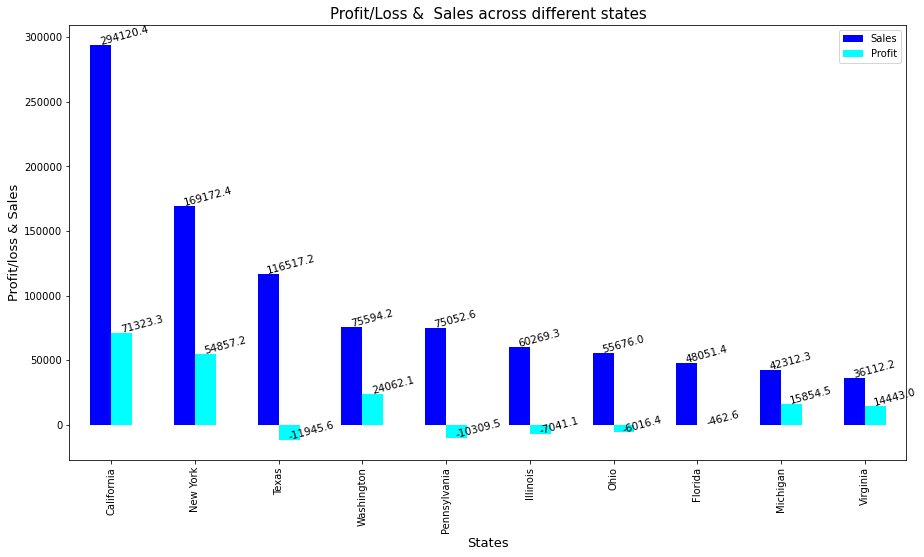

In [26]:
## Sales and Profit Vs State
D = data.groupby('State')[['Sales','Profit']].sum().round(1).sort_values(by='Sales',ascending=False).head(10)
ax=D.plot.bar(color=['blue','cyan'],figsize=(15,8))
plt.title('Profit/Loss &  Sales across different states',fontsize=15)
plt.xlabel('States',fontsize=13)
plt.ylabel('Profit/loss & Sales',fontsize=13)
for j in ax.patches:
    ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height()),fontsize=10.5,color='black',rotation=15)

##### OBSERVATIONS:
1. California has the most sales and made the most Profits
2. Texas has made a loss even when the sales were comparatively  high
3. Pennysylvania,Illinois,Ohio and Florida made a loss along with Texas.
4. Michigan and Virginia made good profits even when their sales were comparitively less

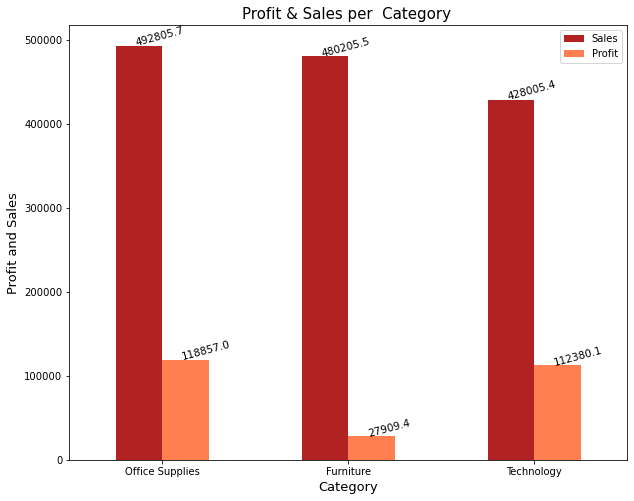

In [27]:
## Sales and Profit Vs Category
e= data.groupby('Category')[['Sales','Profit']].sum().round(1).sort_values(by='Sales',ascending=False)
ax=e.plot.bar(color=['firebrick','coral'],figsize=(10,8))
plt.title('Profit & Sales per  Category ',fontsize=15)
plt.xlabel('Category',fontsize=13)
plt.ylabel('Profit and Sales',fontsize=13)
plt.xticks(rotation=0)
for j in ax.patches:
    ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height()),fontsize=10.5,color='black',rotation=15)

##### OBSERVATIONS:
1. Office Supplies has made the most sales and profits
2. Furniture has made less profits compared to the sales.

In [28]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

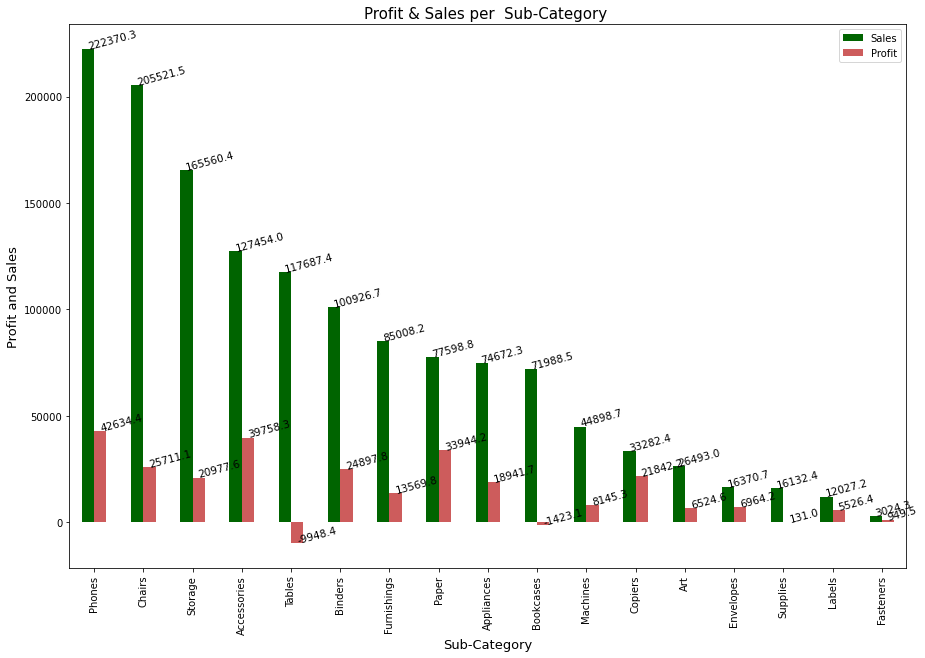

In [29]:
## Sales and Profit Vs Sub-Category
f= data.groupby('Sub-Category')[['Sales','Profit']].sum().round(1).sort_values(by='Sales',ascending=False)
ax=f.plot.bar(color=['darkgreen','indianred'],figsize=(15,10))
plt.title('Profit & Sales per  Sub-Category ',fontsize=15)
plt.xlabel('Sub-Category',fontsize=13)
plt.ylabel('Profit and Sales',fontsize=13)
plt.xticks(rotation=90)
for j in ax.patches:
    ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height()),fontsize=10.5,color='black',rotation=15)

##### OBSERVATIONS:
1. Phones have made the most Profits and sales compared to others.
2. Tables and bookcases have incurred a loss even after having good sales.

In [30]:
df=data.groupby('Sub-Category')[['Sales','Profit','Discount']].sum().round(1).reset_index().sort_values(by='Profit',ascending=True)
df

,Sub-Category,Sales,Profit,Discount
16,Tables,117687.4,-9948.4,83.4
4,Bookcases,71988.5,-1423.1,48.1
15,Supplies,16132.4,131.0,14.6
8,Fasteners,3024.3,949.5,17.8
10,Labels,12027.2,5526.4,25.0
2,Art,26493.0,6524.6,59.6
7,Envelopes,16370.7,6964.2,20.4
11,Machines,44898.7,8145.3,35.2
9,Furnishings,85008.2,13569.8,132.4
1,Appliances,74672.3,18941.7,77.6


In [31]:
df.corr()

,Sales,Profit,Discount
Sales,1.000000,0.606805,0.300450
Profit,0.606805,1.000000,0.311563
Discount,0.300450,0.311563,1.000000


##### OBSERVATIONS:
1. Profit and Sales have a very high correlation
2. Profit and Discount have a correlation of 0.31

### Steps to be taken so that profits can be increased:
1. Furniture makes the least profit even after good amount of Sales. Inorder to increase the profits we can market the products that comes under furniture and give some goodies for free along with the products for first 15 days to attract customers.
2. Tables make good amount of sales and still incurs loss. Discounts given on tables is very high. We can decrease the amount of discount given and it can be sold on home shopping channels or be used as a PPL in youtube channels(realted to tables) which increases the sales which inturn increases the profit.
3. For bookshelves we can target a particular age group and curate the Ads and give PPL to related content creators or bloggers.This increases the people viewing the product which in turn increases the sales and profits.
4. Texas has incurred losses even after having a good share of sales. We can convert these losses into profits by decreasing the discounts given by a small amount and giving some points to the regular customers in the area and as an event for 10 days  we can allow them to use Same day and First Class Shipping modes for free.